Saved coverage_vs_quantile_single.(png|pdf)


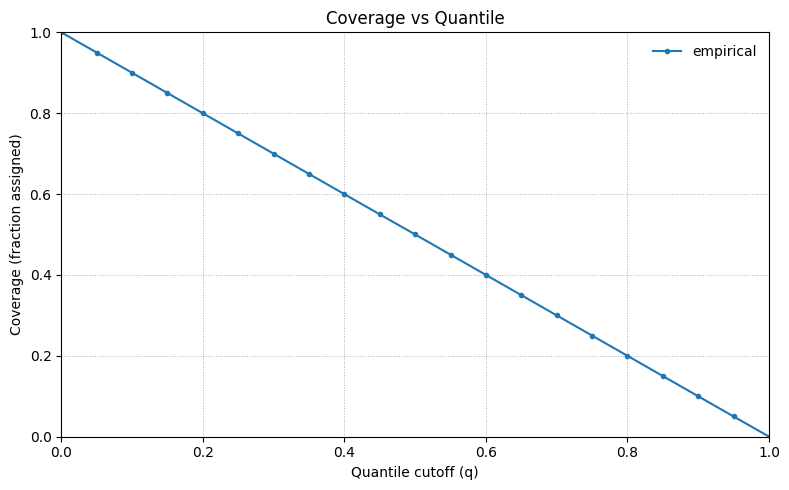

In [ ]:
# plot_quantile_vs_coverage.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

CSV = "coverage_sweep.csv"  # change path if needed

# Read + coerce numerics
df = pd.read_csv(CSV)
for col in ["quantile", "coverage"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Keep rows that have both quantile & coverage
qf = df.dropna(subset=["quantile", "coverage"]).copy()

# Collapse across floors: take the MAX coverage per quantile
agg = (qf.groupby("quantile", as_index=False)["coverage"]
         .max()
         .sort_values("quantile"))

x = agg["quantile"].to_numpy()
y = agg["coverage"].to_numpy()

plt.figure(figsize=(8, 5))
plt.plot(x, y, marker="o", linewidth=1.5, markersize=3, label="coverage vs. quantile)
# theory overlay: y = 1 - q
qline = np.linspace(0, 1, 201)
#plt.plot(qline, 1 - qline, linestyle="--", linewidth=1, label="theory: 1 − q")

plt.xlim(0, 1); plt.ylim(0, 1)
plt.xlabel("Quantile cutoff (q)")
plt.ylabel("Coverage (fraction assigned)")
plt.title("Coverage vs Quantile")
plt.grid(True, linestyle=":", linewidth=0.7)
plt.legend(frameon=False)
plt.tight_layout()
plt.savefig("coverage_vs_quantile_single.png", dpi=300)
plt.savefig("coverage_vs_quantile_single.pdf", dpi=300)
print("Saved coverage_vs_quantile_single.(png|pdf)")

